# **Principal Component Analysis (PCA)**

---



In this lab enhancement, the following are done using PCA:

1. Explanation & Description of PCA concepts
2. Dimensionality Reduction (wine dataset from sklearn)
3. Data Visualization for 1, 2 & 3 component (wine dataset from sklearn)
4. Data Visualization for 1, 2 & 3 component (animal image dataset - real world dataset[modified])
5. PCA to enhance Machine Learning algorithm (breast cancer dataset from sklearn)
---
### **History:**

Karl Pearson created PCA in 1901 as a mechanical equivalent of the main axis theorem. Harold Hotelling separately devised and gave the acronym in the 1930s.

### **Definition:**

*    PCA, or principal component analysis, is a linear dimensionality reduction
     approach used in data preparation, visualization, and exploratory analysis.

*   PCA falls within the domain of Unsupervised Machine Learning.

*   The primary objective of PCA is to minimize the number of variables in a data collection while preserving as much information as is practical.

### **Uses:**

**Dimensionality Reduction:**

By lowering the number of dimensions, it can compress data while keeping the majority of the information. This may simplify models, lessen overfitting, and speed up computation.

**Data Visualization:**

High-dimensional data may be shown in smaller dimensions using PCA. PCA facilitates the visualization and analysis of data patterns and correlations by projecting data into a lower-dimensional domain, usually 2D or 3D.

**Noise Reduction:**

Data noise may be removed from data with the use of PCA. PCA significantly reduces the impact of noisy or irrelevant information, enhancing the overall quality of the data by concentrating on the main components that capture the most variance in the data.

**Data Preprocessing:**

Prior to using further machine learning methods, PCA can be used as a preprocessing step. PCA may enhance the performance of classifiers and regression models by lowering the dimensionality of the data and eliminating duplicate information, particularly when working with high-dimensional data.

### **Advantages:**
*   Enhnace Model Speed
*   Enhance Visualization

### **Disadvantages:**
*   Requires data normaliztion
*   Information Loss


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Data Exploration using Wine Dataset**

The code below loads the wine dataset from sklearn. Then, the code extracts the features, class labels, and feature names from the wine dataset and assign them to variables. Then it prints out the types of the extracted component. This helps in verifying the data types. Then, it prints out the dimensions of the data array, the target array, and the number of feature names. Finally it print the actual content of wine_data, wine_labels, and wine_feature_names.

In [2]:
from sklearn.datasets import load_wine

dataset = load_wine()

wine_data = dataset.data
wine_labels = dataset.target
wine_feature_names = dataset.feature_names

print(type(wine_data))
print(type(wine_labels))
print(type(wine_feature_names))

print(wine_data.shape)
print(wine_labels.shape)
print(len(wine_feature_names))

print(wine_data)
print(wine_labels)
print(wine_feature_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
(178, 13)
(178,)
13
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color

The below code first reshapes the wine_labels array to have a single column and creates a DataFrame by combining the reshaped labels with the wine data. Then, it appends 'label' to wine_feature_names to denote the class column, sets the DataFrame's column names accordingly and replaces numeric class labels with more descriptive ones.

In [3]:
wine_labels = wine_labels.reshape((-1, 1))
wine_df = pd.DataFrame(np.concatenate([wine_data, wine_labels], axis=1))

wine_feature_names_with_label = np.append(wine_feature_names, 'label')
wine_df.columns = wine_feature_names_with_label

wine_df["label"].replace(0, "Class 0", inplace=True)
wine_df["label"].replace(1, "Class 1", inplace=True)
wine_df["label"].replace(2, "Class 2", inplace=True)

In [4]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Class 0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Class 0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Class 0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Class 0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Class 0


In [5]:
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,Class 2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,Class 2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,Class 2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,Class 2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,Class 2


## **PCA for Dimensionality Reduction using Wine Dataset**

Simple code for PCA to reduce dimensionality using wine dataset

The code below loads the Wine dataset, performs PCA for dimensionality reduction to only keep four components, transforms the data. Finally, it prints the original and reduced dimensions of the data.

In [6]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

wine = load_wine()
X = wine.data

pca = PCA(n_components=4)        # Performing PCA and keeping only 4 components
X_pca = pca.fit_transform(X)

print("Original dimensions:", X.shape)
print("Reduced dimensions:", X_pca.shape)

Original dimensions: (178, 13)
Reduced dimensions: (178, 4)


## **PCA for Data Visualization using Wine Dataset**

Normalization

The below code standardizes the features extracted from the DataFrame wine_df using StandardScaler and prints the shape of the standardized array. Then, it calculates and prints its mean and standard deviation, then creates a new DataFrame with standardized features and assigns column names.

In [7]:
from sklearn.preprocessing import StandardScaler

X = wine_df.loc[:, wine_feature_names].values
X = StandardScaler().fit_transform(X) # normalizing the features

print(X.shape)

print("np.mean(X) =", np.mean(X))
print("np.std(X) =", np.std(X))

feature_columns = ['feature' + str(i) for i in range(X.shape[1])]

X_normalized = pd.DataFrame(X, columns=feature_columns)

(178, 13)
np.mean(X) = 4.66735072755122e-16
np.std(X) = 1.0


In [8]:
X_normalized.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


Since visualization can only be done for 1, 2 and 3 component. We have visualize the dataset for 1,2 and 3 components using scatter plot.

**Performing PCA for 1 principal component using wine dataset**

This code below uses PCA to reduce the dimensionality of dataset to 1 principal components. It then creates a DataFrame wine_pca_df to store these components. Finally, it prints the explained variation per principal component and displays the tail of the transformed DataFrame.

In [9]:
wine_pca = PCA(n_components=1)
wine_principal_components = wine_pca.fit_transform(X)

wine_pca_df = pd.DataFrame(data=wine_principal_components,
                           columns=["principal component 1"])

print('Explained variation per principal component: {}'.format(wine_pca.explained_variance_ratio_))

wine_pca_df.tail()

Explained variation per principal component: [0.36198848]


,principal component 1
173,-3.370524
174,-2.601956
175,-2.677839
176,-2.387017
177,-3.208758


Below is to viusalize 1 component PCA using scatter plot

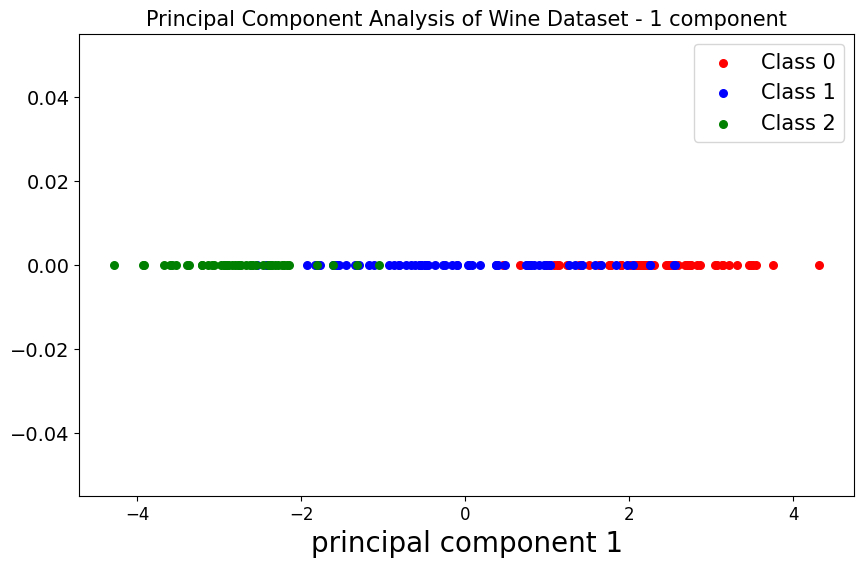

In [10]:
plt.figure(figsize=(10, 6))

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("principal component 1", fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset - 1 component", fontsize=15)

targets = ['Class 0', 'Class 1', 'Class 2']
colors = ['r', 'b', 'g']

y_value = 0

for target, color in zip(targets, colors):
    indices_to_keep = wine_df["label"] == target
    x_values = wine_pca_df.loc[indices_to_keep, 'principal component 1']
    plt.scatter(x_values,
                [y_value] * len(x_values),
                c=color, s=30)

plt.legend(targets, prop={'size': 15})

plt.show()

From the scatter plot above, we can see that there is quite a lot of overlap between Class 0 and Class 1, which indicates there there is some similarity between these 2 classes. There is also overlap between the Class 1 and Class 2

**Performing PCA for 2 principal component using wine dataset**

This code below uses PCA to reduce the dimensionality of dataset to 2 principal components. It then creates a DataFrame wine_pca_df to store these components. Finally, it prints the explained variation per principal component and displays the tail of the transformed DataFrame.

In [11]:
wine_pca = PCA(n_components=2)
wine_principal_components = wine_pca.fit_transform(X)

wine_pca_df = pd.DataFrame(data=wine_principal_components,
                           columns=["principal component 1", "principal component 2"])

print('Explained variation per principal component: {}'.format(wine_pca.explained_variance_ratio_))

wine_pca_df.tail()

Explained variation per principal component: [0.36198848 0.1920749 ]


,principal component 1,principal component 2
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347
177,-3.208758,-2.768920


This code is done to visualize the PCA of wine dataset with 2 components using a scatter plot.

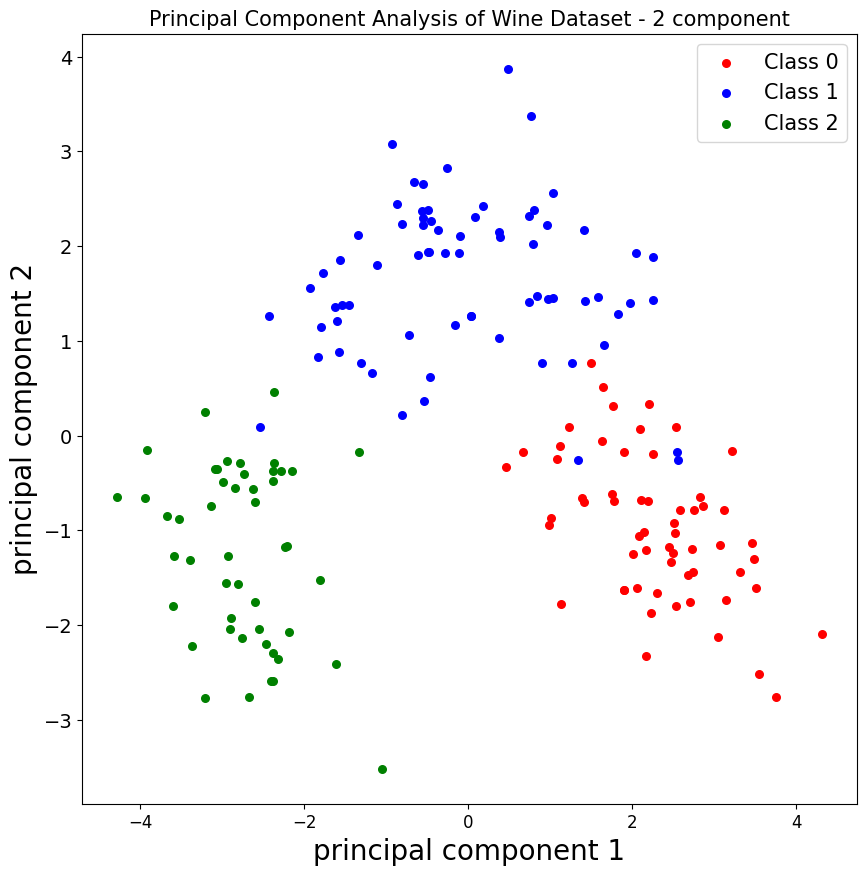

In [12]:
plt.figure(figsize=(10, 10))

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("principal component 1", fontsize=20)
plt.ylabel("principal component 2", fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset - 2 component", fontsize=15)

targets = ['Class 0', 'Class 1', 'Class 2']
colors = ['r', 'b', 'g']

for target, color in zip(targets, colors):
    indices_to_keep = wine_df["label"] == target
    plt.scatter(wine_pca_df.loc[indices_to_keep, 'principal component 1'],
                wine_pca_df.loc[indices_to_keep, 'principal component 2'],
                c=color, s=30)

plt.legend(targets, prop={'size': 15})

plt.show()

Based on the scatter plot above, we can see that the points for each class are clustered together but there is a little overlap between Class 1 and Class 2, indicating that there are some similarity between the 2 classes. There is also a little overlap between Class 0 and Class 1.

**Performing PCA for 3 principal component using Wine dataset**

This code below uses PCA to reduce the dimensionality of dataset to 3 principal components. It then creates a DataFrame wine_pca_df to store these components. Finally, it prints the explained variation per principal component and displays the tail of the transformed DataFrame.

In [13]:
wine_pca = PCA(n_components=3)
wine_principal_components = wine_pca.fit_transform(X)

wine_pca_df = pd.DataFrame(data=wine_principal_components,
                           columns=["principal component 1", "principal component 2", "principal component 3"])

print('Explained variation per principal component: {}'.format(wine_pca.explained_variance_ratio_))

wine_pca_df.tail()

Explained variation per principal component: [0.36198848 0.1920749  0.11123631]


,principal component 1,principal component 2,principal component 3
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696
177,-3.208758,-2.768920,1.013914


This code is done to visualize the PCA of wine dataset with 3 components using a 3D scatter plot.

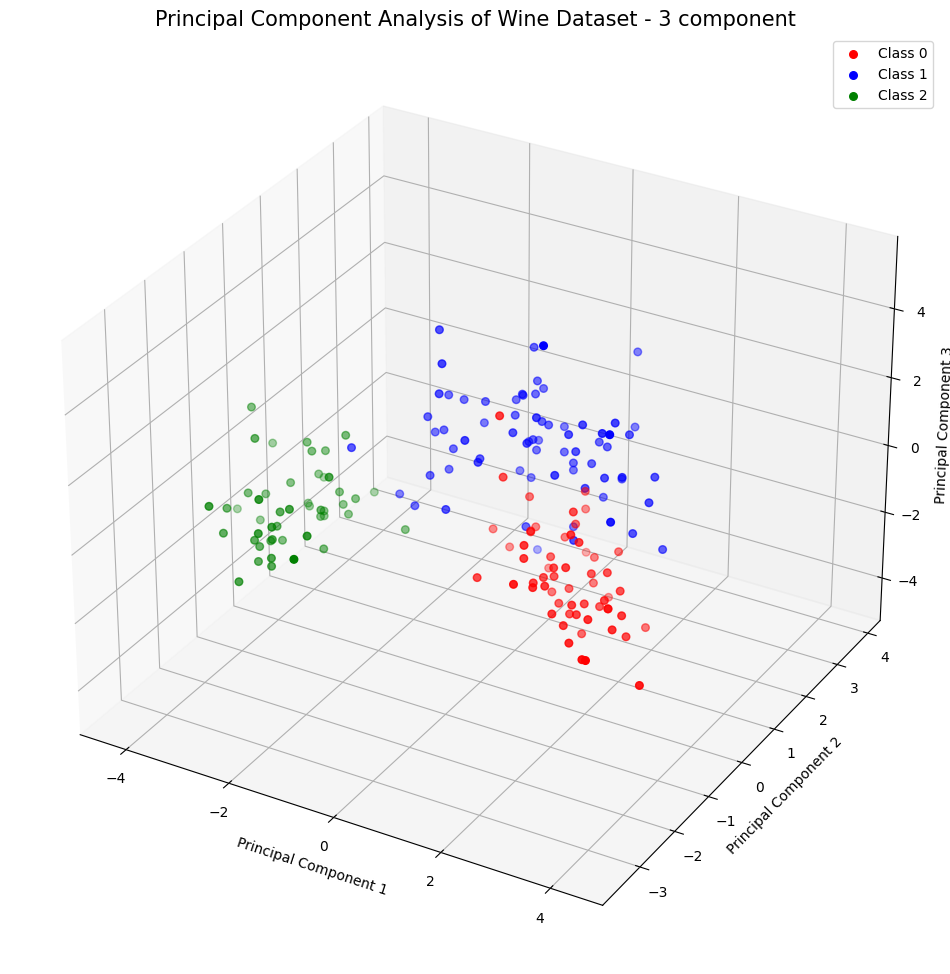

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

targets = ['Class 0', 'Class 1', 'Class 2']
colors = ['r', 'b', 'g']

for target, color in zip(targets, colors):
    indices_to_keep = wine_df["label"] == target
    ax.scatter(wine_pca_df.loc[indices_to_keep, 'principal component 1'],
               wine_pca_df.loc[indices_to_keep, 'principal component 2'],
               wine_pca_df.loc[indices_to_keep, 'principal component 3'],
               c=color, s=30)

ax.set_xlabel("Principal Component 1", fontsize=10)
ax.set_ylabel("Principal Component 2", fontsize=10)
ax.set_zlabel("Principal Component 3", fontsize=10)
ax.set_title("Principal Component Analysis of Wine Dataset - 3 component", fontsize=15)

plt.legend(targets, prop={'size': 10})
plt.show()

## **Data Exploration using Animal Image Dataset (real world dataset - modified)**

In [15]:
import os

# Check if the code is running on Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Mount Google Drive
    drive.mount('/content/drive')

    # Set notebook path in Google Colab
    animal_images_path = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/3_LabEnhancements_PCA/Animal Image"

    # Change the current working directory to notebook path
    os.chdir(animal_images_path)

    # Print current working directory
    print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING | GROUP SUBMISSIONS/3_LabEnhancements_PCA/Animal Image


The code below iterates through the directory containing images, loading and converting them into arrays. These arrays are stored in lists and then converted into NumPy arrays for features and labels. The dataset is split into training and testing sets with a test size of 20%. A subset of 800 training samples and 200 testing samples are selected, and the shapes are printed.

In [16]:
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

image_paths = []
labels = []

# Iterate through each class directory
for label in os.listdir(animal_images_path):
    class_path = os.path.join(animal_images_path, label)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image_paths.append(image_path)
            labels.append(label)

# Load images and convert them to arrays
images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(32, 32))
    img_array = img_to_array(img)
    images.append(img_array)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Taking a small subset of the data
(X_train, y_train), (X_test, y_test) = (X_train[:800], y_train[:800]), (X_test[:200], y_test[:200])

print("X_train.shape =", X_train.shape)
print("X_test.shape =", X_test.shape)
print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (32, 32, 32, 3)
X_test.shape = (8, 32, 32, 3)
y_train.shape = (32,)
y_test.shape = (8,)


In [17]:
# This part finds and prints the total number of unique classes in the training dataset and lists these unique class labels.

unique_labels = np.unique(y_train)
num_classes = len(unique_labels)

print('Total number of classes:', num_classes)
print('Class labels:', unique_labels)

Total number of classes: 4
Class labels: ['horse' 'koala' 'penguin' 'tiger']


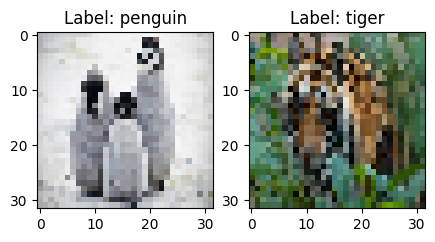

In [18]:
# This part displays the first image and the label from the training dataset in one subplot. It also displays the first image
# from the testing dataset and its label in another subplot.

plt.figure(figsize=[5, 5])

plt.subplot(121)
curr_img = X_train[0]
plt.imshow(curr_img.astype('uint8'))
plt.title(f"Label: {y_train[0]}")

plt.subplot(122)
curr_img = X_test[0]
plt.imshow(curr_img.astype('uint8'))
plt.title(f"Label: {y_test[0]}")

plt.show()

## **PCA for Data Visualization using Animal Image Dataset (real world dataset[modified])**

In [19]:
# This part prints the minimum and maximum pixel values for both the training and testing datasets.

print("Minimum pixel value in X_train:", np.min(X_train))
print("Maximum pixel value in X_train:", np.max(X_train))

print("Minimum pixel value in X_test:", np.min(X_test))
print("Maximum pixel value in X_test:", np.max(X_test))

Minimum pixel value in X_train: 0.0
Maximum pixel value in X_train: 255.0
Minimum pixel value in X_test: 0.0
Maximum pixel value in X_test: 255.0


The below code normalizes the pixel values of both the training and testing set by dividing each pixel value by the maximum pixel value in its respective dataset. It scales them to the range [0, 1]. It then prints the new minimum and maximum pixel values after normalization.

In [20]:
X_train = X_train / np.max(X_train)
X_test  = X_test  / np.max(X_test)

print("Minimum pixel value in normalized X_train:", np.min(X_train))
print("Maximum pixel value in normalized X_train:", np.max(X_train))

print("Minimum pixel value in normalized X_test:", np.min(X_test))
print("Maximum pixel value in normalized X_test:", np.max(X_test))

Minimum pixel value in normalized X_train: 0.0
Maximum pixel value in normalized X_train: 1.0
Minimum pixel value in normalized X_test: 0.0
Maximum pixel value in normalized X_test: 1.0


This code flattens the image arrays in both sets into 2D arrays using the reshape() method. It then prints the new shapes of the flattened sets.

In [21]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened  = X_test.reshape(X_test.shape[0], -1)

print("Shape of flattened X_train:", X_train_flattened.shape)
print("Shape of flattened X_test:", X_test_flattened.shape)

Shape of flattened X_train: (32, 3072)
Shape of flattened X_test: (8, 3072)


In [22]:
# This code organizes the flattened pixel values of the training set and their corresponding class labels into a DataFrame named animal_df.
# It generates column names for the flattened pixel values and adds a label column. Finally, it prints the shape of animal_df.

# Create column names for flattened pixel values
feature_columns = ['pixel' + str(i) for i in range(X_train_flattened.shape[1])]

# Create DataFrame with flattened pixel values
animal_df = pd.DataFrame(X_train_flattened, columns=feature_columns)

animal_df["label"] = y_train
print("Shape of animal_df:", animal_df.shape)

Shape of animal_df: (32, 3073)


In [23]:
animal_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.698039,0.701961,0.717647,0.729412,0.733333,0.741176,0.752941,0.764706,0.784314,0.772549,...,0.780392,0.784314,0.792157,0.694118,0.698039,0.713726,0.607843,0.603922,0.623529,penguin
1,0.250980,0.172549,0.066667,0.549020,0.631373,0.235294,0.541176,0.611765,0.290196,0.545098,...,0.349020,0.392157,0.172549,0.301961,0.333333,0.133333,0.384314,0.423529,0.219608,koala
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.980392,1.000000,0.980392,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,horse
3,0.670588,0.443137,0.254902,0.549020,0.352941,0.207843,0.415686,0.243137,0.129412,0.254902,...,0.674510,0.596078,0.568627,0.784314,0.705882,0.678431,0.831373,0.741176,0.717647,koala
4,0.686275,0.764706,0.619608,0.521569,0.690196,0.470588,0.580392,0.721569,0.549020,0.741176,...,0.454902,0.792157,0.058824,0.662745,0.925490,0.752941,0.588235,0.823529,0.541176,tiger


**Performing PCA for 1 principal component for animal image dataset**


This part applies PCA to a subset of the flattened training set. PCA is performed for 1 component in this part. It organizes these components with corresponding class labels in a DataFrame and prints the explained variation per principal component. Finally, it displays the head of the transformed dataframe.

In [24]:
animal_pca = PCA(n_components=1)
animal_principal_components = animal_pca.fit_transform(X_train_flattened[:1000])

animal_pca_df = pd.DataFrame(data=animal_principal_components,
                             columns=["principal component 1"])

animal_pca_df['label'] = y_train[:1000]

print('Explained variation per principal component: {}'.format(animal_pca.explained_variance_ratio_))

animal_pca_df.head()

Explained variation per principal component: [0.43024597]


,principal component 1,label
0,13.762640,penguin
1,-8.952490,koala
2,19.805849,horse
3,-2.071058,koala
4,7.266961,tiger


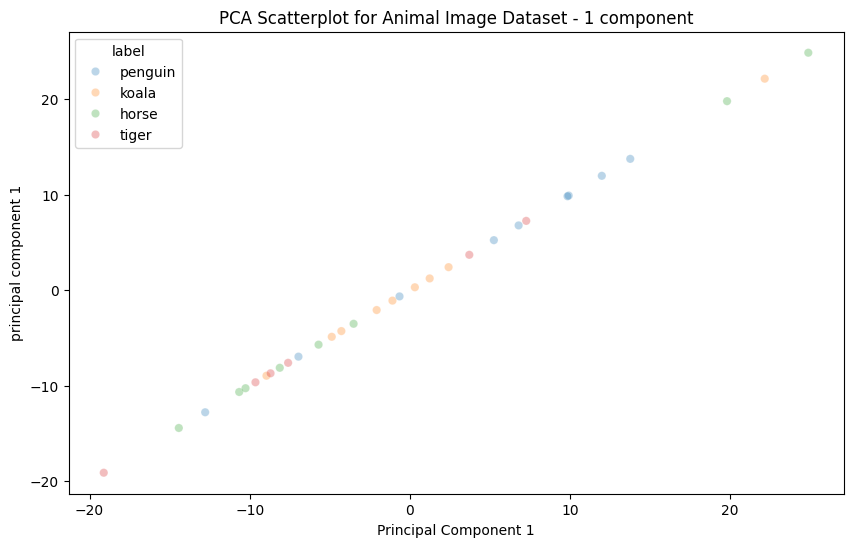

In [25]:
# Visualization of 1 component PCA for animal image dataset

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="principal component 1",
    y="principal component 1",
    hue="label",
    palette=sns.color_palette("tab10", len(np.unique(y_train))),
    data=animal_pca_df,
    legend="full",
    alpha=0.3
)

plt.title('PCA Scatterplot for Animal Image Dataset - 1 component')  # Updated title
plt.xlabel('Principal Component 1')
plt.show()


The scatter plot above plots PC1 againts itself. Based on the scatter plot above, we can see that it has a positive linear correlation in PC1 when it is plotted againts itself. The points are not clustered together, indicating a weak relationship between the animals.

**Performing PCA for 2 principal component for animal image dataset**

This part applies PCA to a subset of the flattened training set. PCA is performed for 2 components in this part. It organizes these components with corresponding class labels in a DataFrame and prints the explained variation per principal component. Finally, it displays the head of the transformed dataframe.

In [26]:
animal_pca = PCA(n_components=2)
animal_principal_components = animal_pca.fit_transform(X_train_flattened[:1000])

animal_pca_df = pd.DataFrame(data=animal_principal_components,
                             columns=["principal component 1", "principal component 2"])

animal_pca_df['label'] = y_train[:1000]

print('Explained variation per principal component: {}'.format(animal_pca.explained_variance_ratio_))

animal_pca_df.head()

Explained variation per principal component: [0.43024594 0.08048978]


,principal component 1,principal component 2,label
0,13.762633,-0.605972,penguin
1,-8.952485,2.330470,koala
2,19.805853,8.751979,horse
3,-2.071060,-2.273191,koala
4,7.266957,-1.791371,tiger


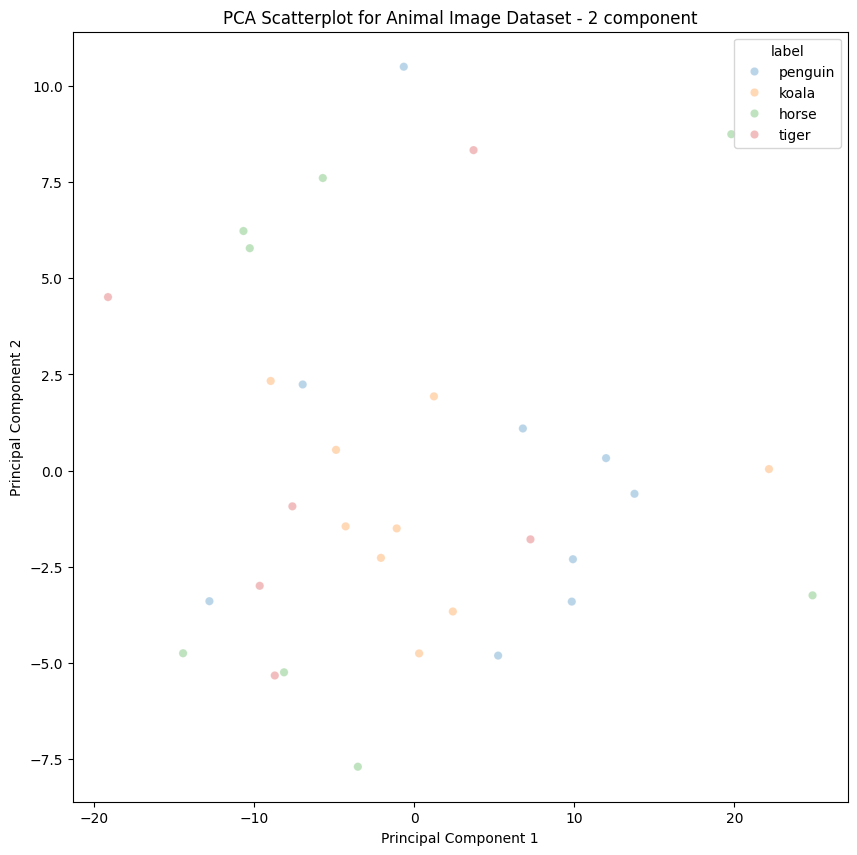

In [27]:
# This code is done to visualize the PCA of animal image dataset with 2 components using a scatter plot.

plt.figure(figsize=(10, 10))

sns.scatterplot(
    x="principal component 1",
    y="principal component 2",
    hue="label",
    palette=sns.color_palette("tab10", len(np.unique(y_train))),
    data=animal_pca_df,
    legend="full",
    alpha=0.3
)

plt.title('PCA Scatterplot for Animal Image Dataset - 2 component')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

From the scatter plot above, we can see that it is scattered randomly, indicating that there is a weak relationship between the animals.

**Performing PCA for 3 principal component for animal image dataset**

This part applies PCA to a subset of the flattened training set. PCA is performed for 3 components in this part. It organizes these components with corresponding class labels in a DataFrame and prints the explained variation per principal component. Finally, it displays the head of the transformed dataframe.

In [28]:
animal_pca = PCA(n_components=3)
animal_principal_components = animal_pca.fit_transform(X_train_flattened[:1000])

animal_pca_df = pd.DataFrame(data=animal_principal_components,
                             columns=["principal component 1", "principal component 2", "principal component 3"])

animal_pca_df['label'] = y_train[:1000]

print('Explained variation per principal component: {}'.format(animal_pca.explained_variance_ratio_))

animal_pca_df.head()

Explained variation per principal component: [0.43024594 0.08048978 0.05218896]


,principal component 1,principal component 2,principal component 3,label
0,13.762639,-0.605988,4.357487,penguin
1,-8.952489,2.330394,2.206962,koala
2,19.805841,8.751975,-3.772443,horse
3,-2.071059,-2.273272,-6.271341,koala
4,7.266958,-1.791415,0.589113,tiger


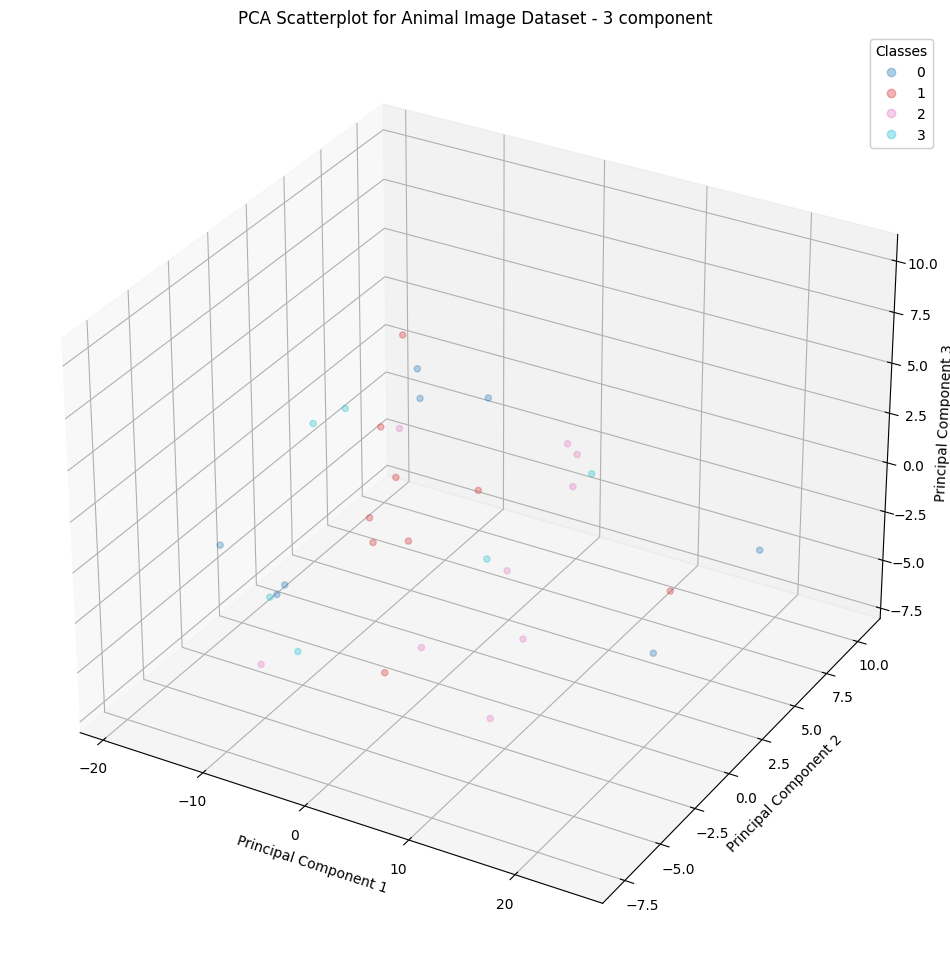

In [29]:
# This code is done to visualize the PCA of animal image dataset with 3 components using a 3D scatter plot. Before visualization is done,
# the string label is converted to numerical to perform 3d scatter plot.

# convert string to numeric values to ensure data format is suitable for visualization
label_mapping = {label: i for i, label in enumerate(np.unique(animal_pca_df["label"]))}
animal_pca_df["label_numeric"] = animal_pca_df["label"].map(label_mapping)

fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    xs=animal_pca_df["principal component 1"],
    ys=animal_pca_df["principal component 2"],
    zs=animal_pca_df["principal component 3"],
    c=animal_pca_df["label_numeric"],
    cmap='tab10',
    alpha=0.3
)

ax.set_title('PCA Scatterplot for Animal Image Dataset - 3 component')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

legend = ax.legend(*scatter.legend_elements(), title="Classes", loc="best", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.show()

## **PCA to speed Machine Learning algorithm using Breast Cancer Dataset**

In [30]:
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
data = load_breast_cancer()
X = data.data
y = data.target

# loads the Breast Cancer dataset and assigns the features to X and the target labels to y.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# splits the dataset into training and testing sets, then standardizes the features using StandardScaler

The code below trains logistic regression model without PCA. Then, it calculates the accuracy of the model and prints out the accuracy and the time taken for training in seconds.

In [33]:
# Logistic Regression without PCA
lr_no_pca_start_time = time.time()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
lr_no_pca_end_time = time.time()

y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_no_pca_logreg = accuracy_score(y_test, y_pred_logreg)
print("\n Logistic Regression -  without PCA")
print("-----------------------------------------")
print("\nAccuracy without PCA:", accuracy_no_pca_logreg)
print("Time taken without PCA:", lr_no_pca_end_time - lr_no_pca_start_time, "seconds")


 Logistic Regression -  without PCA
-----------------------------------------

Accuracy without PCA: 0.9736842105263158
Time taken without PCA: 0.03129267692565918 seconds


In [34]:
# PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# PCA is performed here to reduce the dimensionality of the features to 3 components

The code below trains logistic regression model using PCA. It predicts the target labels for PCA-transformed testing data. Then, it calculates the accuracy of the model and prints out the accuracy score and the time taken for training in seconds.

In [35]:
# Logistic Regression with PCA
lr_with_pca_start_time = time.time()
logreg_pca = LogisticRegression(max_iter=1000)
logreg_pca.fit(X_train_pca, y_train)
lr_with_pca_end_time = time.time()

y_pred_pca_logreg = logreg_pca.predict(X_test_pca)
accuracy_with_pca_logreg = accuracy_score(y_test, y_pred_pca_logreg)
print("\n Logistic Regression -  with PCA")
print("--------------------------------------")
print("\nAccuracy with PCA:", accuracy_with_pca_logreg)
print("Time taken with PCA:", lr_with_pca_end_time - lr_with_pca_start_time, "seconds")


 Logistic Regression -  with PCA
--------------------------------------

Accuracy with PCA: 0.9824561403508771
Time taken with PCA: 0.014214277267456055 seconds


Comparison of time taken for logistic regression model without PCA and with PCA is shown below.

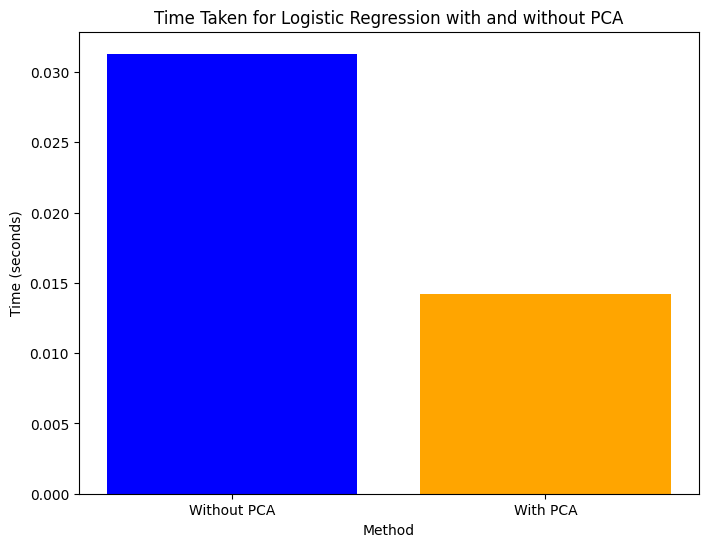

In [36]:
methods = ['Without PCA', 'With PCA']
times = [lr_no_pca_end_time - lr_no_pca_start_time, lr_with_pca_end_time - lr_with_pca_start_time]  # Update with your actual time values

plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=['blue', 'orange'])
plt.title('Time Taken for Logistic Regression with and without PCA')
plt.xlabel('Method')
plt.ylabel('Time (seconds)')
plt.show()

We can see that the time taken for the model after PCA is SHORTER AND LESSER than the time taken before performing PCA. This shows that PCA can speed up the Machine Learning model. The time taken will differ each time the code is executed.

Reference



1.   https://builtin.com/machine-learning/pca-in-python
2.   https://en.wikipedia.org/wiki/Principal_component_analysis#Overview
3. https://www.analyticsvidhya.com/blog/2022/07/principal-component-analysis-beginner-friendly/
4. https://praxis.ac.in/what-is-principal-component-analysis/
5. https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals [dataset taken from here but it is modified to fewer classes]